In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Function to apply intensity transformation to a single pixel
def transform_pixel_intensity(pixel_value: int):
    # Apply a linear transformation for pixel values in the range [50, 150]
    if 50 <= pixel_value <= 150:
        return 155 / 100 * pixel_value + 22.5
    else:
        return pixel_value

# Function to apply intensity transformation to the entire image
def apply_intensity_transformation(image: np.ndarray):
    transformed_image = np.zeros(image.shape, dtype=np.uint8)

    # Iterate over each pixel and apply the transformation
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            transformed_image[row, col] = transform_pixel_intensity(image[row, col])
    
    return transformed_image

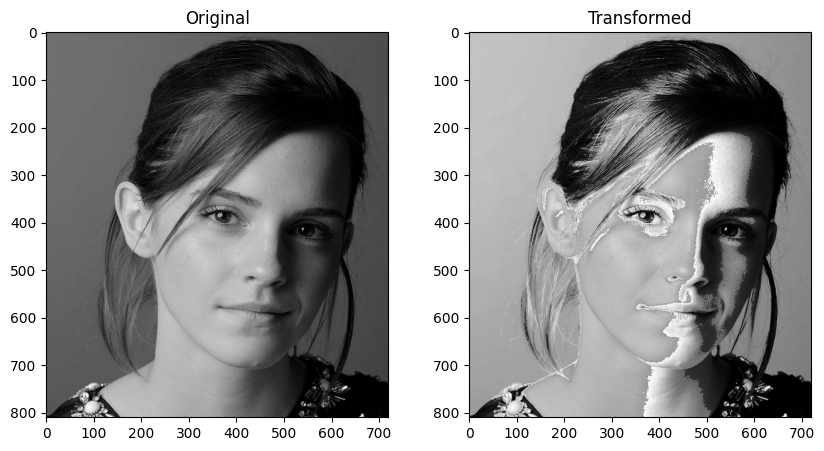

In [12]:
# Load the grayscale image
img = cv2.imread("a1images/emma.jpg", cv2.IMREAD_GRAYSCALE)

# Apply the intensity transformation function to the image
transformed_img = apply_intensity_transformation(img)

# Plot the original and transformed images 
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Transformed")
plt.imshow(transformed_img, cmap='gray')

plt.show()

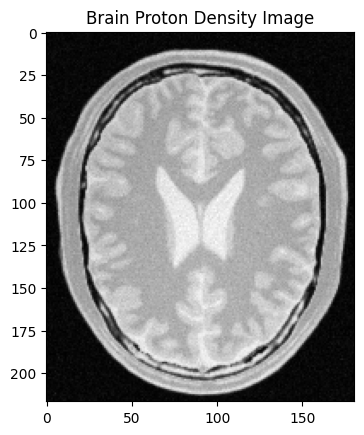

(217, 181)


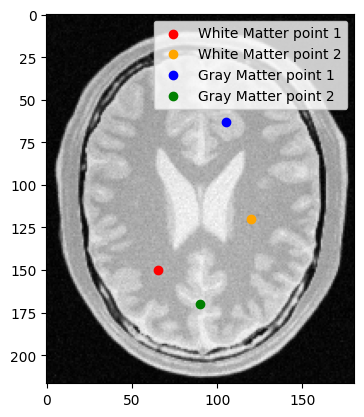

White Matter Intensity of white matter point 1 : 171
Gray Matter Intensity gray matter point 1: 190
White Matter Intensity of white matter point 2 : 182
Gray Matter Intensity gray matter point 2: 216


In [38]:
# Load the brain proton density image
brain_img = cv2.imread("a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(brain_img, cmap='gray')
plt.title("Brain Proton Density Image")
plt.show()

# Print the shape of the image
print(brain_img.shape)  # Output: (217, 181)

# Define points for white and gray matter
wm_point_1 = (65, 150)
wm_point_2 = (120, 120)
gm_point_1 = (105, 63)
gm_point_2 = (90, 170)


# Show points on the brain image
plt.imshow(brain_img, cmap="gray")
plt.scatter(*wm_point_1, color='red', label='White Matter point 1')
plt.scatter(*wm_point_2, color='orange', label='White Matter point 2')
plt.scatter(*gm_point_1, color='blue', label='Gray Matter point 1')
plt.scatter(*gm_point_2, color='green', label='Gray Matter point 2')
plt.legend()
plt.show()

# Extract pixel intensities
# Switch (x, y) to (y, x) for extracting pixel values
wm_intensity_1 = brain_img[wm_point_1[1], wm_point_1[0]] 
gm_intensity_1 = brain_img[gm_point_1[1], gm_point_1[0]]  
wm_intensity_2 = brain_img[wm_point_2[1], wm_point_2[0]]  
gm_intensity_2 = brain_img[gm_point_2[1], gm_point_2[0]]  

# Print pixel intensities
print(f"White Matter Intensity of white matter point 1 : {wm_intensity_1}")
print(f"Gray Matter Intensity gray matter point 1: {gm_intensity_1}")
print(f"White Matter Intensity of white matter point 2 : {wm_intensity_2}")
print(f"Gray Matter Intensity gray matter point 2: {gm_intensity_2}")

In [36]:
print(f"Image min intensity: {brain_img.min()}, max intensity: {brain_img.max()}")


Image min intensity: 0, max intensity: 251


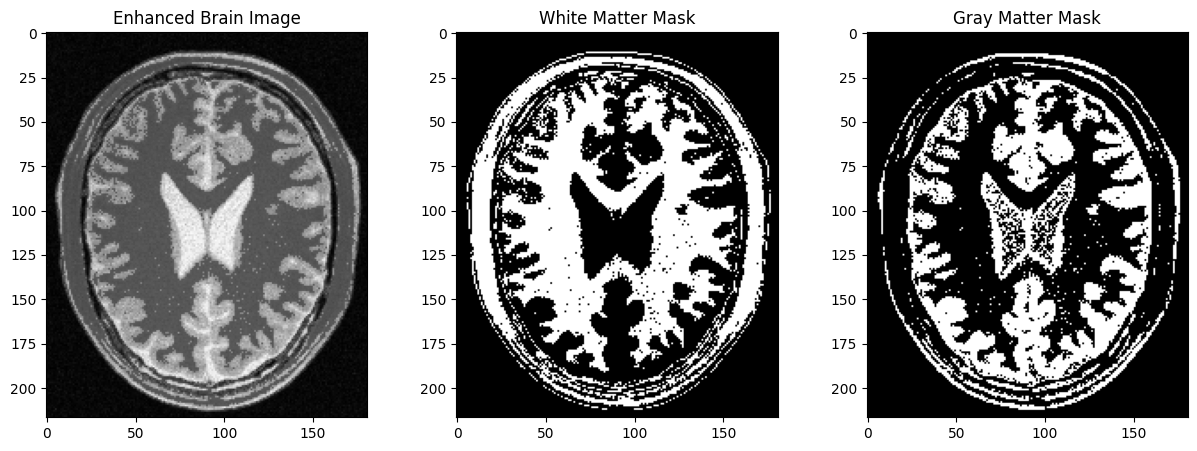

In [93]:
# Function to enhance white and gray matter in the brain image
def accentuateMatter(image):
    img_copy = np.copy(image)
    
     # Enhance gray matter (183 <= pixel <= 230)
    gray_mask = (image >= 183) & (image <= 230)
    img_copy[gray_mask] = 2 * image[gray_mask] + 20
    
    # Enhance white matter (100 <= pixel <= 182)
    white_mask = (image >= 100) & (image <= 182)
    img_copy[white_mask] = 0.5 * image[white_mask] 
    
    return img_copy, white_mask, gray_mask

# Load the brain image
brain_img = cv2.imread("a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)

# Apply the enhancement
enhanced_img, white_mask, gray_mask = accentuateMatter(brain_img)

# Display the transformed image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(enhanced_img, cmap='gray')
plt.title("Enhanced Brain Image")

# Display the white matter mask
plt.subplot(1, 3, 2)
plt.imshow(white_mask, cmap='gray')
plt.title("White Matter Mask")

# Display the gray matter mask
plt.subplot(1, 3, 3)
plt.imshow(gray_mask, cmap='gray')
plt.title("Gray Matter Mask")

plt.show()

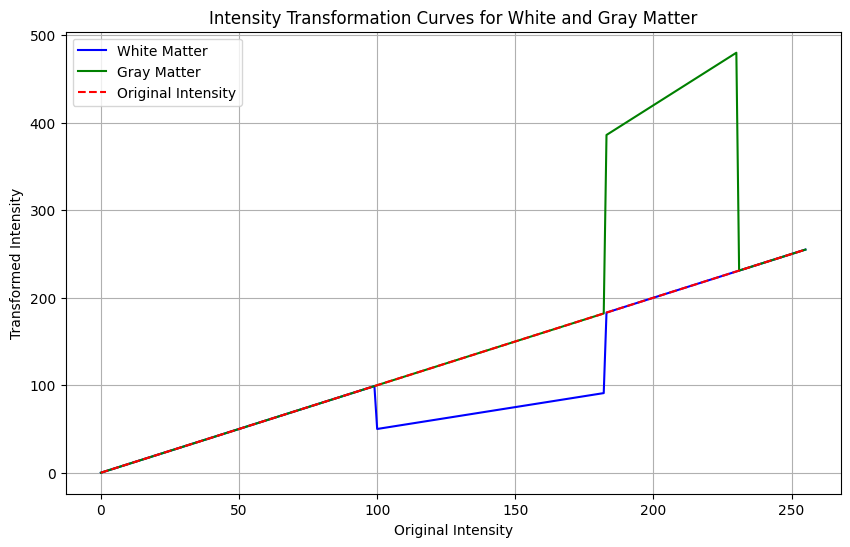

In [94]:
intensities = np.arange(256)

# Apply transformations to white and gray matter based on intensity ranges
gray_transformed = np.array([2 * i + 20 if 183 <= i <= 230 else i for i in intensities])
white_transformed = np.array([0.5 * i if 100 <= i <= 182 else i for i in intensities])

# Plot the transformation curves
plt.figure(figsize=(10, 6))
plt.plot(intensities, white_transformed, label='White Matter', color='blue')
plt.plot(intensities, gray_transformed, label='Gray Matter', color='green')
plt.plot(intensities, intensities, label='Original Intensity', linestyle='--', color='red')
plt.title('Intensity Transformation Curves for White and Gray Matter')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')
plt.legend()
plt.grid(True)
plt.show()
